<h1>Hotel Bookings</h1>


we will try to answer to this questions: 
what makes a bookings a good booking?
what features have fact in booking? 
by using data of two hotel .
and building a model that can predict future booking.
    

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hotel=pd.read_csv('hotel_bookings.csv')

## EDA

In [4]:
hotel.shape

(119390, 32)

In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [55]:
missing=pd.DataFrame(columns=['name-col','N_miss','%'])

In [61]:
T=hotel.shape[0]
l1=[]
l2=[]
l3=[]
for v in hotel.columns:
    x=hotel[hotel[v].isnull()].shape[0]
    if(x>0):
        y=x/T
        l1.append(v)
        l2.append(x)
        l3.append(y)
     
        

missing['name-col']=l1  
missing['N_miss']=l2 
missing['%']=l3 

         
        
    

In [62]:
missing

,name-col,N_miss,%
0,children,4,0.000034
1,country,488,0.004087
2,agent,16340,0.136862
3,company,112593,0.943069


as company contain 94% of value that are missing

In [63]:
hotel.drop('company',axis=1,inplace=True)

In [65]:
hotel.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
SMR        1
BHS        1
NPL        1
UMI        1
ASM        1
Name: country, Length: 177, dtype: int64

as we see the are many countries with are dominant in our data lik PRT GBA FRA then which one we gonna choose to replace 488 missing value ,if we decide to replace it 
with value after or behind  missng value we have many countries thatdo not appear 2 times in data ,maybe this missng value dor countries witch is not in our data .
for agent we gonna drop the columns because if we drop 16400 of columns we gonna loss so mush data 

In [66]:
index=hotel[hotel['country'].isnull()].index


In [68]:
hotel.drop(index,inplace=True)

In [71]:
hotel.drop('agent',axis=1,inplace=True)

In [72]:
hotel['children'].value_counts()

0.0     110319
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: children, dtype: int64

reolacing nan in children with 0 

In [74]:
hotel['children']=hotel['children'].fillna(0)

------------------------------------------------------

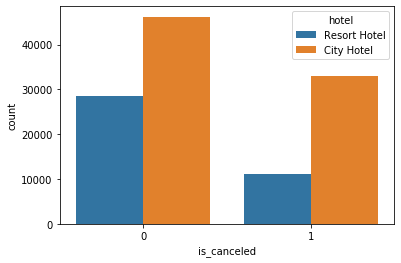

In [77]:
sns.countplot(hue='hotel',x='is_canceled',data=hotel)

as we see people do booking in cityhotel more then Resort Hotel

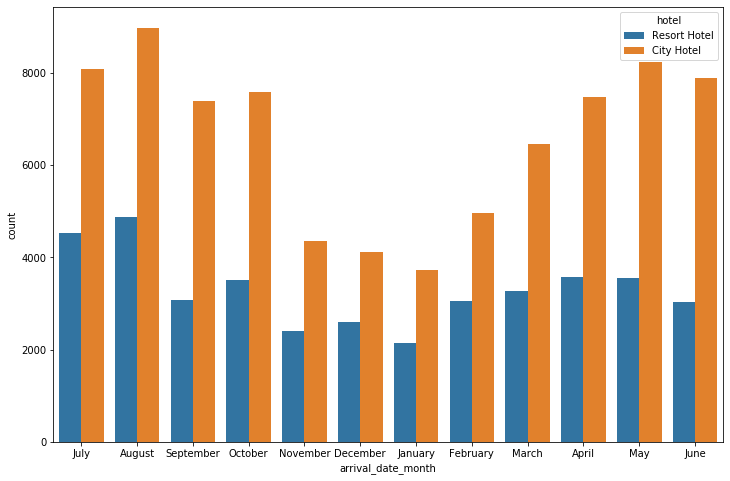

In [81]:
fig=plt.figure(figsize=(12,8))
ax=sns.countplot(hue='hotel',x='arrival_date_month',data=hotel)
plt.show(ax)

August is month whitch poeple do booking for both hotel 

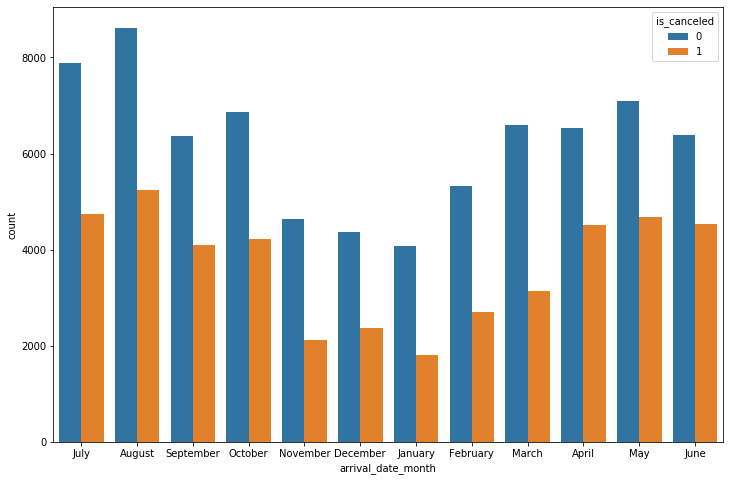

In [82]:
fig=plt.figure(figsize=(12,8))
ax=sns.countplot(hue='is_canceled',x='arrival_date_month',data=hotel)
plt.show(ax)

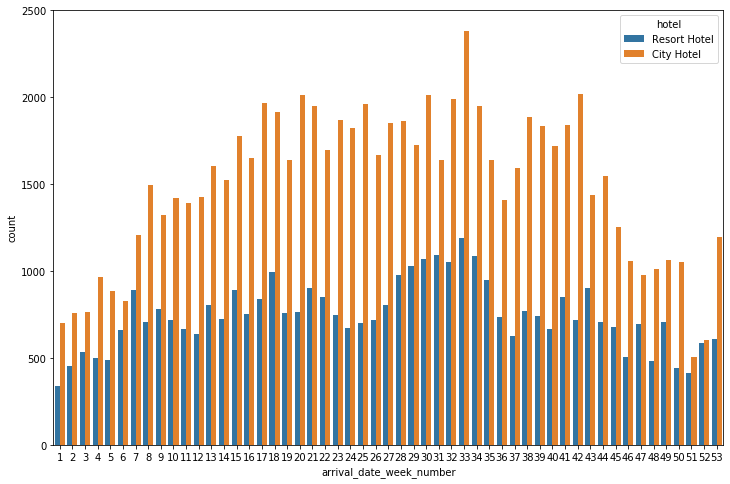

In [84]:
fig=plt.figure(figsize=(12,8))
ax=sns.countplot(hue='hotel',x='arrival_date_week_number',data=hotel)
plt.show(ax)

as we see week 33 ,poeple do booking for both hotel,and this i the last week of august

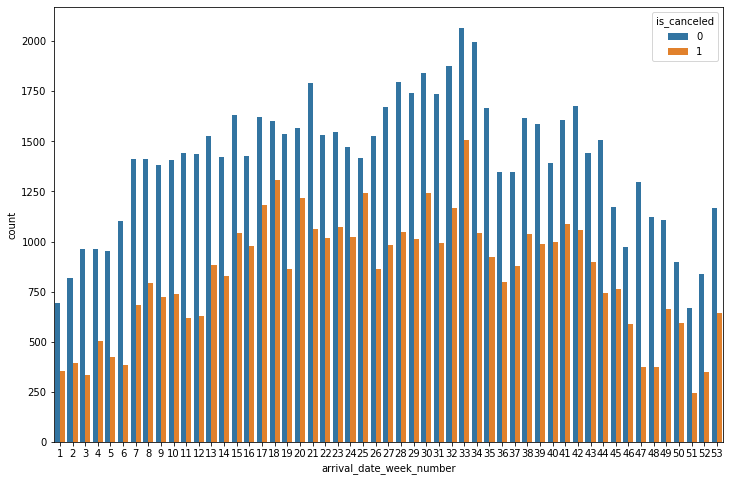

In [85]:
fig=plt.figure(figsize=(12,8))
ax=sns.countplot(hue='is_canceled',x='arrival_date_week_number',data=hotel)
plt.show(ax)

in the same week the numbre of cancelation hight ,maybe poeple do not found places in this hotel in this week ,

In [86]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

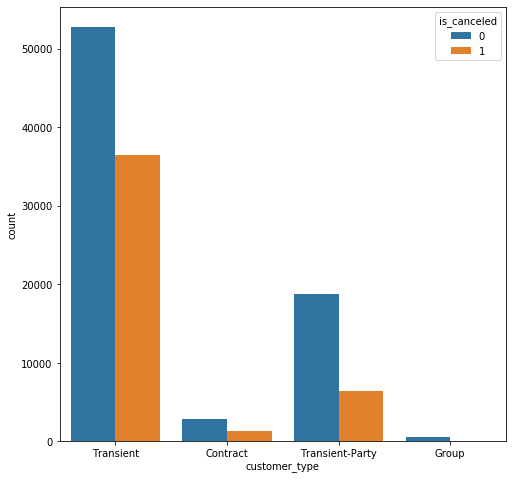

In [88]:
fig=plt.figure(figsize=(8,8))
ax=sns.countplot(hue='is_canceled',x='customer_type',data=hotel)
plt.show(ax)

as we see transient type who do much booking  and  whirch have most canceled booking for both hotel 


In [98]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


let's  regroup  stays_in_weekend_nights stays_in_week_nights in on column stay_in_night

In [99]:
y=hotel['stays_in_weekend_nights']+hotel['stays_in_week_nights']

y contain nombre of night staying in hotel for all  week

In [100]:
hotel['stay_in_night']=y

In [103]:
hotel.drop(['stays_in_weekend_nights', 'stays_in_week_nights'],axis=1,inplace=True)

let regroup children, babies,and adult in one column called numbre_person

In [104]:
lis=[]
for i,j,k in zip(hotel['children'],hotel['adults'],hotel['babies']):
    lis.append(i+j+k)

In [106]:
hotel['numbre_person']=lis
hotel['numbre_person']=hotel['numbre_person'].astype(int)

In [107]:
hotel.drop(['children', 'babies','adults'],axis=1,inplace=True)

In [108]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stay_in_night,numbre_person
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


let see number of requests 

In [112]:
hotel['total_of_special_requests'].value_counts()

0    69991
1    33124
2    12923
3     2487
4      339
5       38
Name: total_of_special_requests, dtype: int64

let's note that the for every booking have a note between 1 to 5 .
then we need convert column is_canceled to not-canceled

In [113]:
v=hotel['is_canceled']
lis=[]
for i in v :
    if(i==0):
        lis.append(1)
    else:
        lis.append(0)

In [114]:
hotel['not_canceled']=lis

In [115]:
hotel.drop('is_canceled',axis=1,inplace=True)

In [118]:
hotel['note_of_booking']=lis*hotel['total_of_special_requests'] ## column of notation of booking

In [117]:
hotel.drop('not_canceled',axis=1,inplace=True)

In [121]:
hotel.drop('total_of_special_requests',axis=1,inplace=True)

In [122]:
hotel.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'reservation_status',
       'reservation_status_date', 'stay_in_night', 'numbre_person',
       'note_of_booking'],
      dtype='object')

we gonna transform month into number and regroup it with number of week 

the new column is month_week   exmple(25 mean month 2 week 5)

In [129]:
tab=['January', 'February', 'March', 'April', 'May', 'June' , 'July', 'August', 'September', 'October', 'November', 'December',]
hotel.reset_index(inplace=True,drop=True)

In [145]:
tab1=[]
for j in range(len(hotel['arrival_date_month'])):
    
    for i in range(len(tab)):
   
        if(hotel['arrival_date_month'][j]==tab[i]):
            tab1.append(i+1)

In [147]:
hotel['arrival_date_month']=tab1

In [148]:
tab3=[]
for i,j in zip(hotel['arrival_date_month'],hotel['arrival_date_week_number']):
    tab3.append(str(i)+str(j))

In [150]:
hotel[' month_week']=tab3
hotel[' month_week']=hotel[' month_week'].astype(int)
hotel.drop(['arrival_date_month','arrival_date_week_number'],axis=1,inplace=True)

In [151]:
hotel.drop(['arrival_date_day_of_month', 'meal'],axis=1,inplace=True)

In [153]:
hotel.drop(['reservation_status_date','arrival_date_year'],axis=1,inplace=True)

In [182]:
hotel.drop(['adr'],axis=1,inplace=True)

lest group data by month_week 

In [183]:
df1=hotel.groupby(' month_week',as_index=False).mean()

In [184]:
df1.corr()

,month_week,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,stay_in_night,numbre_person,note_of_booking
month_week,1.000000,0.439576,-0.239496,0.209057,-0.256516,-0.042742,0.129124,0.097378,0.101631,0.159746,0.143572
lead_time,0.439576,1.000000,-0.626897,0.198031,-0.464953,-0.056647,0.118555,-0.182356,0.483293,0.575235,0.139511
is_repeated_guest,-0.239496,-0.626897,1.000000,-0.065265,0.790708,0.078736,-0.065107,0.401706,-0.530410,-0.525659,-0.184698
previous_cancellations,0.209057,0.198031,-0.065265,1.000000,-0.208242,-0.184484,0.099426,-0.077220,-0.052770,0.000584,-0.161766
previous_bookings_not_canceled,-0.256516,-0.464953,0.790708,-0.208242,1.000000,0.046406,-0.103541,0.447198,-0.361649,-0.362386,-0.115470
booking_changes,-0.042742,-0.056647,0.078736,-0.184484,0.046406,1.000000,-0.193863,0.229254,0.239931,0.142613,0.253062
days_in_waiting_list,0.129124,0.118555,-0.065107,0.099426,-0.103541,-0.193863,1.000000,-0.274706,-0.354208,-0.271883,-0.463603
required_car_parking_spaces,0.097378,-0.182356,0.401706,-0.077220,0.447198,0.229254,-0.274706,1.000000,0.061474,0.200939,0.390156
stay_in_night,0.101631,0.483293,-0.530410,-0.052770,-0.361649,0.239931,-0.354208,0.061474,1.000000,0.717251,0.609455
numbre_person,0.159746,0.575235,-0.525659,0.000584,-0.362386,0.142613,-0.271883,0.200939,0.717251,1.000000,0.626773


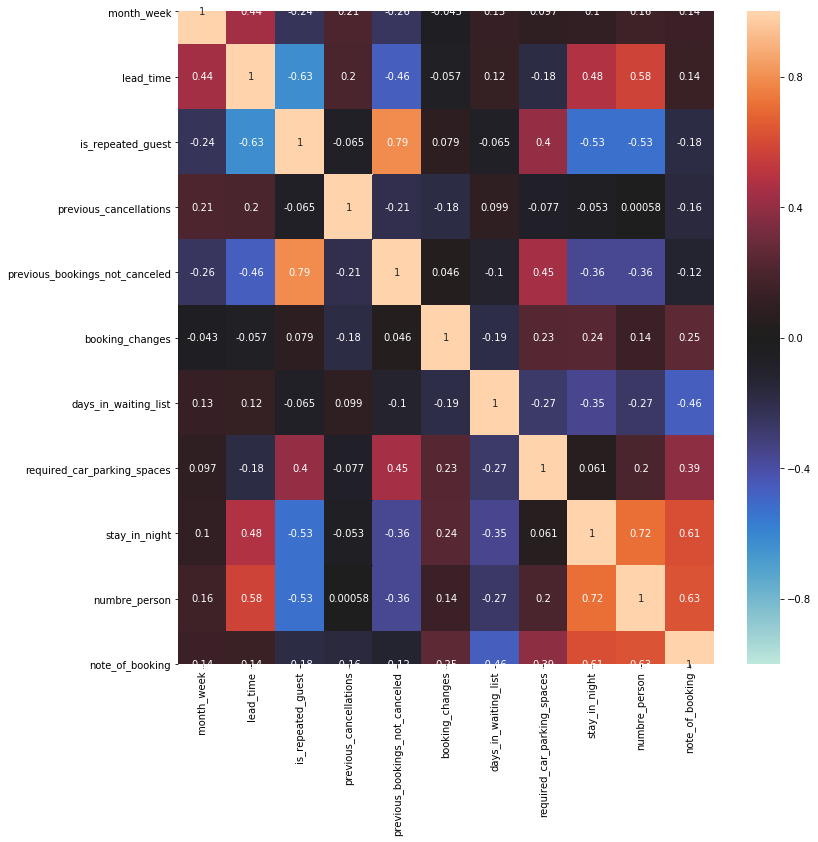

In [185]:
fig=plt.figure(figsize=(12,12))
ax=sns.heatmap(df1.corr(),vmin=-1, vmax=+1,center=0,annot=True)
plt.show(ax)

as we see month week do  not have strong correlation with note_of_booking but its affect note of booking as we seen in the bar figure the is deference between avery month  in nombre of cancelation and booking

then now we gonna transform the column note_of_booking how?

if mean <0.49 we gonna replace it with 0 else 1

In [194]:
la=[]
for v in df1['note_of_booking']:
    if(v<0.49):
        la.append(0)
    else:
        la.append(1)

In [196]:
df1['good_booking']=la    

## MODELING

In [282]:

y=df1['good_booking']

In [306]:
df=pd.get_dummies(data=hotel,columns=['hotel'])
df=df.rename(columns={'hotel_City Hotel':'hotel_City','hotel_Resort Hotel':'hotel_Resort'})

In [307]:
df=df[[' month_week', 'hotel_City',
       'hotel_Resort']]

In [308]:
df=df.groupby(' month_week').mean().reset_index(drop=True)

In [211]:
data.to_csv('data.csv')

In [214]:
from sklearn.model_selection import GridSearchCV

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [311]:
dc=DecisionTreeClassifier()

In [312]:
pram={'criterion':['gini', 'entropy'],'max_depth':[3,4,5,6,7,8,9,10,11,12,13]}


In [285]:
from sklearn.linear_model import LogisticRegression

In [313]:
lr=LogisticRegression()

In [314]:
param={'solver':['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']}

In [309]:
df3=pd.concat([df1,df], axis=1)

In [310]:
x1=df3.drop('good_booking',axis=1)

In [317]:
grid3=GridSearchCV(lr,param,cv=3)# logistic with label hotel
grid3.fit(x1,y)
grid3.best_score_

C:\Users\wahbi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\wahbi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\wahbi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\wahbi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wahbi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not c

0.7428571428571429

In [316]:
grid4=GridSearchCV(dc,pram,cv=3)# decision tree with label hotel
grid4.fit(x1,y)
grid4.best_score_

C:\Users\wahbi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8142857142857143